# Crime Statistics of Los Angeles, California

In [1]:
import re
import folium
import numpy as np
import collections
import pandas as pd
import sqlite3 as sql
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

The above mentioned libraries are the ones we have used in this project. <br>
Library re : It was used to perform regular expression matching operations. <br>
Library folium : It was used to render the geographical map in the notebook. <br>
Library numpy : It was used to perform scientific computing and work with arrays and lists etc. <br>
Library collections : It was used to perform various operations like sort on the dictionaries formed. <br>
Library pandas : It provides us tools like easy data structures to deal with the data by analysing it efficiently. <br>
Library sqlite3 : It was used to establish connection with our database and then be able to run queries to fetch data. <br>
Libraries seaborn and matplotlib.pyplot : These were used to plot our data recieved from the queries efficiently and be able to visualize the same. <br>

In [5]:
#create connection with the database

conn = sql.connect('LA_Crime.db')

Establishing connection with our database

In [20]:
#fetching the dates of the incidents of the last 8 years

DO_query = '''Select `Date Occurred` from LA_Crime'''
DO_dataframe = pd.read_sql_query(DO_query, conn)

Date_Occurred = DO_dataframe['Date Occurred'].tolist()
Date_Frequency = {}
for d in range(0, len(Date_Occurred)):
    Date_Occurred[d] = Date_Occurred[d][6:]
    if (Date_Occurred[d] in Date_Frequency): 
            Date_Frequency[Date_Occurred[d]] = Date_Frequency[Date_Occurred[d]] + 1
    else:
            Date_Frequency[Date_Occurred[d]] = 1
Date_Frequency = collections.OrderedDict(sorted(Date_Frequency.items()))

Here we are fetching the frequency of criminal incidents over the past 8 years to know how the crime rate has varied. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize how the crime rate has varied over the years and see if they have progressed or failed in terms of protecting their city and if they need to be more vigilent with each passing year. <br>
2016 experienced the maximum crime whereas 2017 exprienced a dip in the same. However, over the last 8 years, the crime rate hasn't wavered much which is a cause of concern.

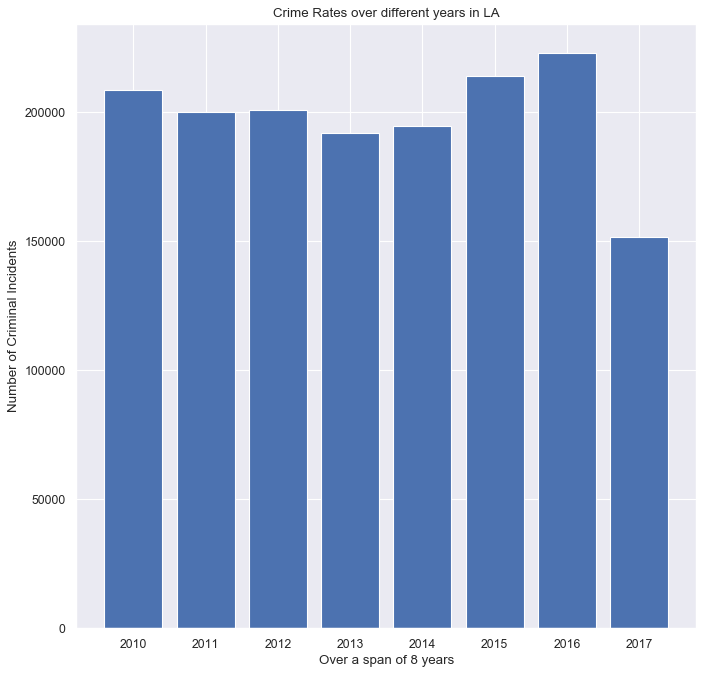

In [22]:
#graph shows highest and lowest crime impacted years

%matplotlib inline
fig = plt.figure(figsize = (10, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.bar(range(len(Date_Frequency)), list(Date_Frequency.values()), align = 'center')
plt.xticks(range(len(Date_Frequency)), list(Date_Frequency.keys()))
plt.xlabel('Over a span of 8 years')
plt.ylabel('Number of Criminal Incidents')
plt.title('Crime Rates over different years in LA')
plt.show()

In [23]:
#fetching the sex of the victims

VS_query = '''Select `Victim Sex`, count(`Victim Sex`) from LA_Crime group by `Victim Sex`'''
VS_dataframe = pd.read_sql_query(VS_query, conn)

VS_type = VS_dataframe['Victim Sex'].tolist()
VS_count = VS_dataframe['count(`Victim Sex`)'].tolist()
VS_dict = {}

for i in range(0, len(VS_type)):
    VS_dict[VS_type[i]] = VS_count[i]

VS_dict['Other'] = VS_dict['H'] + VS_dict['X']
VS_dict['Undisclosed'] = VS_dict[''] + VS_dict['-']
del VS_dict['']
del VS_dict['-']
del VS_dict['H']
del VS_dict['X']

VS_data = pd.DataFrame(list(VS_dict.keys()), list(VS_dict.values()), columns = ['Gender'])
VS_data['Frequency'] = VS_data.index

Here we are fetching the sex of the people targeted. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize the largely impacted gender and provide necessary protection like phone booths to call a helpline or protective cell to seek shelter in or self defense introduction etc. <br>
As one can see from the plot, there are a lot of cases where the gender is not reported or can't ge recognized surely enough to file. <br>
Men and women are almost equally targeted and it's not just limited to them, other genders have also been found to be victims of crimes happening in LA.

Text(0.5, 1.0, 'Impacted Genders')

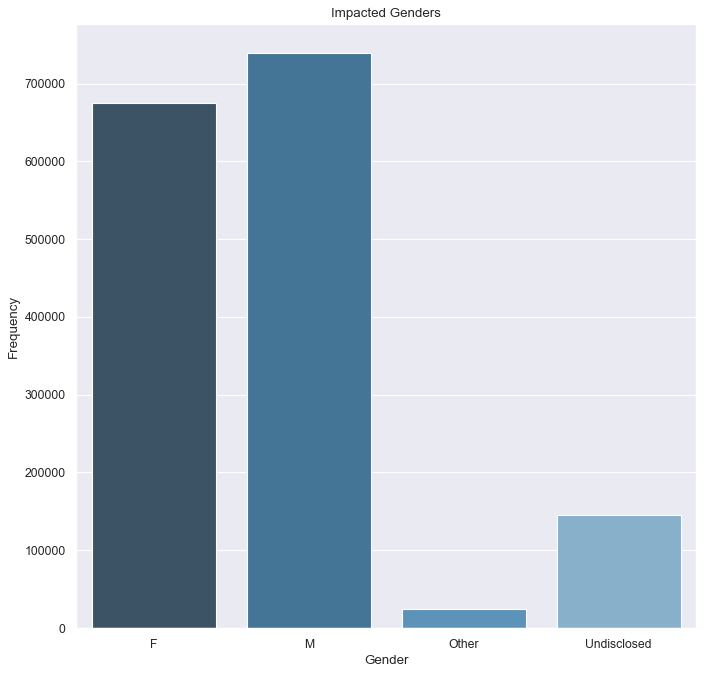

In [24]:
#graph shows the frequency of incidents

%matplotlib inline
fig = plt.figure(figsize = (10, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')
sns.barplot(x = "Gender", y = "Frequency", data = VS_data, palette="Blues_d")
plt.title("Impacted Genders")

In [10]:
#fetching the ages of all the victims

VA_query = '''Select `Victim Age` from LA_Crime'''
VA_dataframe = pd.read_sql_query(VA_query, conn)

Victim_Age = VA_dataframe['Victim Age'].tolist()
Victim_Frequency = {} #max = 99 and min = 10
Victim_Frequency['Children[0-14]'] = 0
Victim_Frequency['Youth[15-24]'] = 0
Victim_Frequency['Adults[25-64]'] = 0
Victim_Frequency['Seniors[65+]'] = 0
Victim_Frequency['Unknown'] = 0
for v in range(0, len(Victim_Age)):
    if Victim_Age[v] != '':
        Victim_Age[v] = float(Victim_Age[v])
        if Victim_Age[v] >= 1.0 and Victim_Age[v] <= 14.0:
            Victim_Frequency['Children[0-14]'] = Victim_Frequency['Children[0-14]'] + 1
        if Victim_Age[v] >= 15.0 and Victim_Age[v] <= 24.0:
            Victim_Frequency['Youth[15-24]'] = Victim_Frequency['Youth[15-24]'] + 1
        if Victim_Age[v] >= 25.0 and Victim_Age[v] <= 64.0:
            Victim_Frequency['Adults[25-64]'] = Victim_Frequency['Adults[25-64]'] + 1
        if Victim_Age[v] >= 65.0 and Victim_Age[v] <= 100.0:
            Victim_Frequency['Seniors[65+]'] = Victim_Frequency['Seniors[65+]'] + 1
    else:
        Victim_Frequency['Unknown'] = Victim_Frequency['Unknown'] + 1            

Here, we are fetcing the ages of all the victims. <br>
Now, it is also important to know the age groups that are often targeted in these situations. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize the mindset of a criminal in a given situation and see what age a victim may fall into when they come across a crime of a similar kind or location. <br>
Adults are the main targets but children or elderly members aren't spared either. Sometimes the crime can be heinous enough that age is difficult to determine.

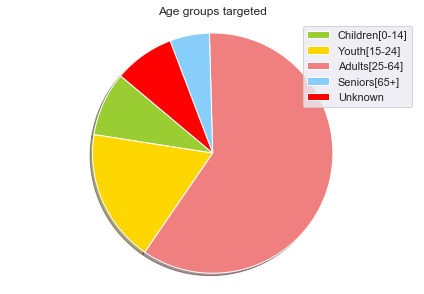

In [11]:
#graph shows most and least impacted age groups

%matplotlib inline
sizes = list(Victim_Frequency.values())
labels = list(Victim_Frequency.keys())
colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue', 'red']
patches, texts = plt.pie(sizes, colors = colors, shadow = True, startangle = 140)
plt.legend(patches, labels, loc = "best")
plt.axis('equal')
plt.tight_layout()
plt.title("Age groups targeted")
plt.show()

In [25]:
#fetching the number of criminal incidents in different areas of LA

AN_query = '''Select count(`Area Name`), `Area Name` from LA_Crime group by `Area Name`'''
AN_dataframe = pd.read_sql_query(AN_query, conn)

Area_Names = AN_dataframe['Area Name'].tolist()
Area_Names_Count = AN_dataframe['count(`Area Name`)'].tolist()

Here we are fetching the Area Names and the number of incidents that have happened there. <br>
This helps us recognize the areas which are more prone to crime. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize the areas which have experienced the maximum crime and provide required safety measures to control this. <br>
77th Street, Southwest, N Hollywood respectively have experienced the maximum crime rate and can be counted among the most unsafe areas of LA.

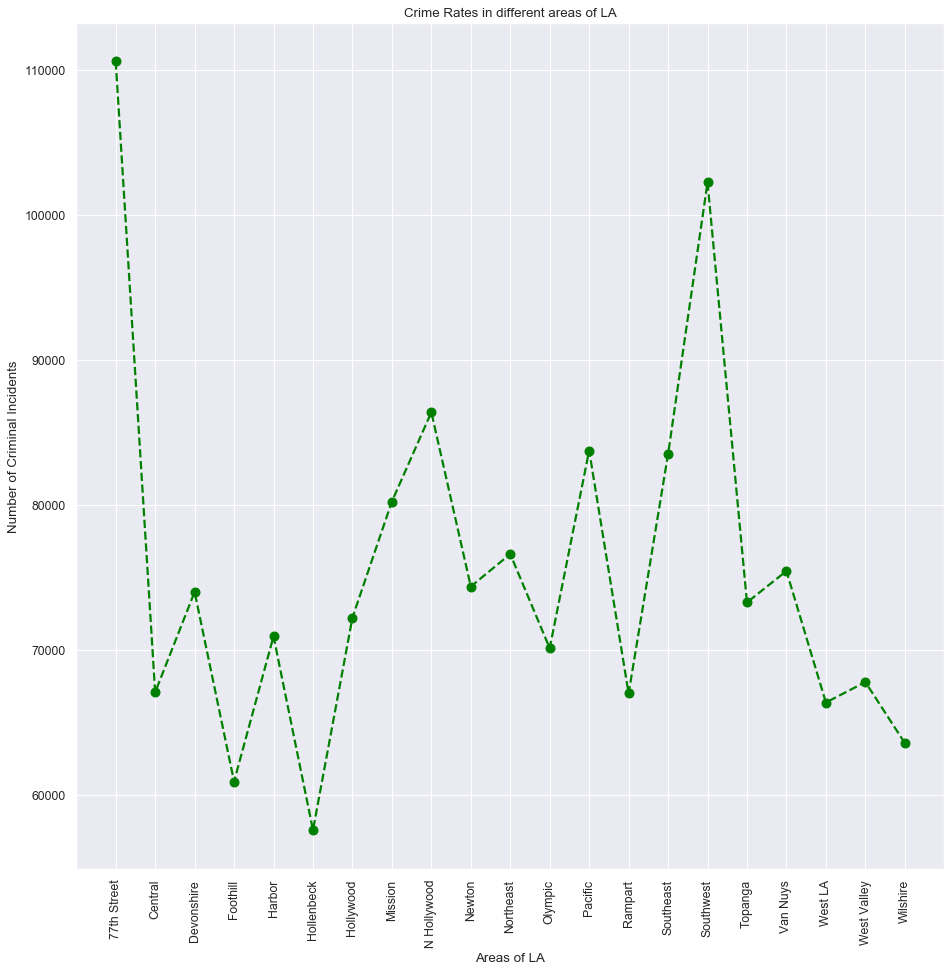

In [26]:
#graph shows highest and lowest crime impacted areas

%matplotlib inline
fig = plt.figure(figsize = (14, 14), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(Area_Names, Area_Names_Count, color='green', marker='o', linestyle = 'dashed', linewidth = 2, markersize = 8)
plt.xlabel('Areas of LA')
plt.ylabel('Number of Criminal Incidents')
plt.title("Crime Rates in different areas of LA")
plt.tick_params(axis ='x', rotation = 90)

In [27]:
#fetching areas with the maximum crime rate

LA_query = '''Select count(`Area Name`), `Area Name`, `Location ` from LA_Crime group by `Area Name`'''
LA_dataframe = pd.read_sql_query(LA_query, conn)

LA_loc = LA_dataframe['Location '].tolist()
LA_area = LA_dataframe['count(`Area Name`)'].tolist()
LA_count = LA_dataframe['Area Name'].tolist()

Here we are fetching the crime statics wrt an area similar to the previous cell. <br>
Looking at the highly impacted locations, we are plotting them on a graph.
This visualization will allow various individuals or organizations like the LA police department to recognize the areas which have experienced the maximum crime and plan on visiting or settling in a safer area. <br>
This would help people recognize the areas where they ought not to go and avoid being victims of crime. <br>
Areas with the maximum crime (can be seen from the previous cell) have been plotted here.

In [28]:
#plotted map shows the areas which were impacted the most crime

m = folium.Map(location = [33.9829, -118.3338], zoom_start = 12)
tooltip = 'Click for more info'

folium.Marker([33.9829, -118.3338],
              pop='<strong>77th Street</strong>',
              tooltip=tooltip,
              icon=folium.Icon(icon='leaf')).add_to(m),

folium.Marker([34.0074, -118.29],
              pop='<strong>Southwest</strong>',
              tooltip=tooltip,
              icon=folium.Icon(icon='leaf')).add_to(m),

folium.Marker([34.2012, -118.416],
              pop='<strong>N Hollywood</strong>',
              tooltip=tooltip,
              icon=folium.Icon(icon='leaf')).add_to(m),

folium.Marker([33.9489, -118.3939],
              pop='<strong>Pacific</strong>',
              tooltip=tooltip,
              icon=folium.Icon(icon='leaf')).add_to(m),

folium.Marker([34.3147, -118.4589],
              pop='<strong>Mission</strong>',
              tooltip=tooltip,
              icon=folium.Icon(icon='leaf')).add_to(m),
              
m.save('map.html')
m

In [29]:
#fetching the description of all the crime scenes

Desc_query = '''Select `Crime Code Description`, count(`Crime Code Description`) from LA_Crime where `Crime Code Description` != '' group by `Crime Code Description`'''
Desc_dataframe = pd.read_sql_query(Desc_query, conn)

CCD_Desc = Desc_dataframe['Crime Code Description'].tolist()
CCD_count = Desc_dataframe['count(`Crime Code Description`)'].tolist()

CCD_Desc_dict = {}
CCD_graph = {}

for i in range(0, len(CCD_Desc)):
    CCD_Desc_dict[CCD_Desc[i]] = CCD_count[i]
    CCD_Desc[i] = CCD_Desc[i].split()[0]
    CCD_Desc[i] = CCD_Desc[i].replace(',', '')

for i in range(0, len(CCD_Desc)):
    for key, value in CCD_Desc_dict.items():
        if CCD_Desc[i] in key :
            if CCD_Desc[i] in CCD_graph:
                CCD_graph[CCD_Desc[i]] += value
            else:
                CCD_graph[CCD_Desc[i]] = value

graph_data = pd.DataFrame(list(CCD_graph.keys()), list(CCD_graph.values()), columns = ['Incidents'])
graph_data['Frequency'] = graph_data.index        

Here we are fetching the type of  crime that happens most often in the city of LA. <br>
Looking at how large the data is, please zoom in to know about the type of crime more clearly. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize the types of crimes which happen the most and looking at the areas from the previous graph, LAPD can come up with an action plan to provide the required assitance to either prevent a crime or manage the aftermath of one more vigilantly and promptly. <br>
As one can clearly see, 'theft' is the main crime that happens in LA and it's count is unimaginably higher than any other crime that happens in LA.

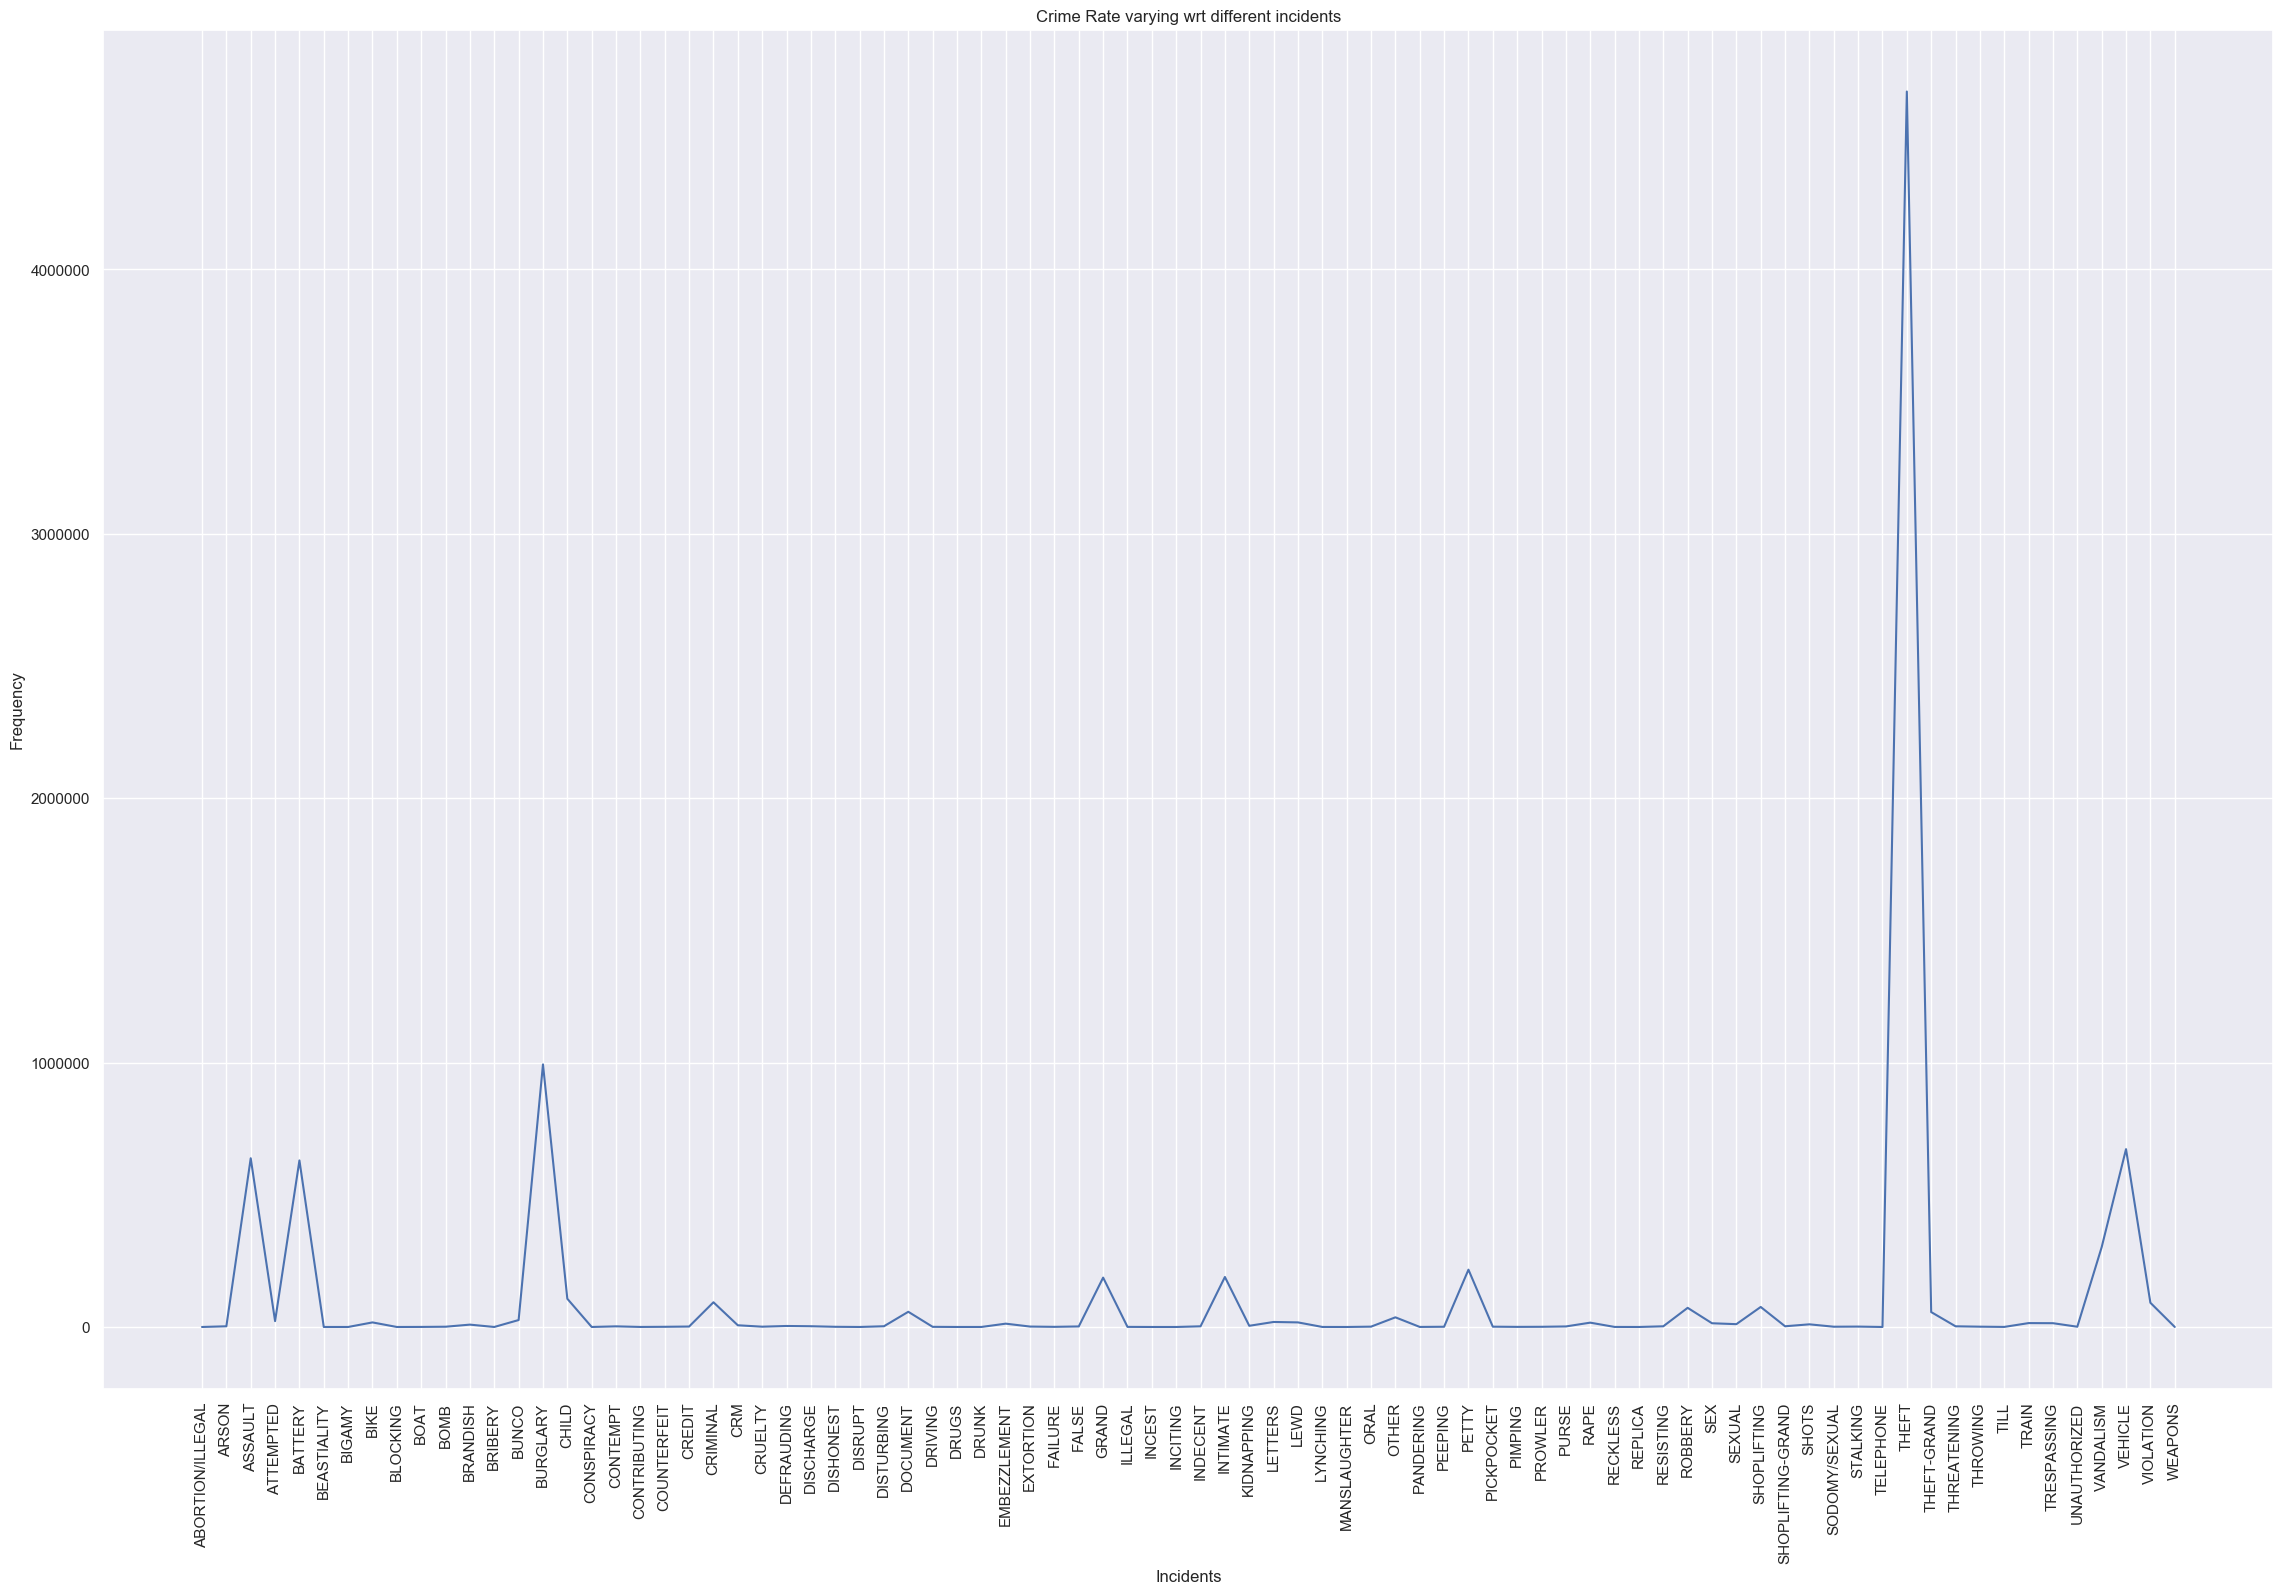

In [30]:
#graph shows the frequency of incidents

%matplotlib inline
fig = plt.figure(figsize = (28, 18), dpi = 100, facecolor = 'w', edgecolor = 'k')
sns.set_style("darkgrid")
sns.lineplot(x = 'Incidents', y = 'Frequency', data = graph_data)
plt.title("Crime Rate varying wrt different incidents")
plt.tick_params(axis ='x', rotation = 90)

In [16]:
#fetching areas with time when an incident occured

TA_query = ''' Select `Time Occurred`, `Area Name` from LA_Crime where `Crime Code Description` != '' and `Area Name` != '' '''
TA_dataframe = pd.read_sql_query(TA_query, conn)

Area_Name = TA_dataframe['Area Name'].tolist()
Time_Occurred = TA_dataframe['Time Occurred'].tolist()
Area_Time = {}

for i in range(0, len(Area_Name)):
    if i not in Area_Time.keys():
        Area_Time[Area_Name[i]] = []

for i in range(0, len(Area_Name)):
    if Time_Occurred[i] not in Area_Time[Area_Name[i]]:
        Area_Time[Area_Name[i]].append(Time_Occurred[i])
        
for key in Area_Time.keys():
    median = 0
    l = len(Area_Time[key])
    Area_Time[key].sort(key = int)
    if l % 2 == 0:
        j = round(l/2)
        median = Area_Time[key][j]
    else:
        j = round((l + 1) / 2)
        median = Area_Time[key][j]
    Area_Time[key] = []
    Area_Time[key] = median
    
AreaTime_data = pd.DataFrame(list(Area_Time.keys()), list(Area_Time.values()), columns = ['Areas'])
AreaTime_data['Time'] = AreaTime_data.index

Here we are fetching the different times at which LA has experienced crime. <br>
Looking at how large the data is, we had to trim down certain values to ensure that the data could be plotted clearly. <br>
This visualization will allow various individuals or organizations like the LA police department to recognize the time at which most of the crimes happen and provide maximum vigilance in areas fetched from our previous graphs during the time slots that appear to have maximum criminal incidents happening. <br>
Most of the crimes happen between noon and 1 which turns out to be a major cause of concern as one mainly thinks that crime rate is the highest after dark.

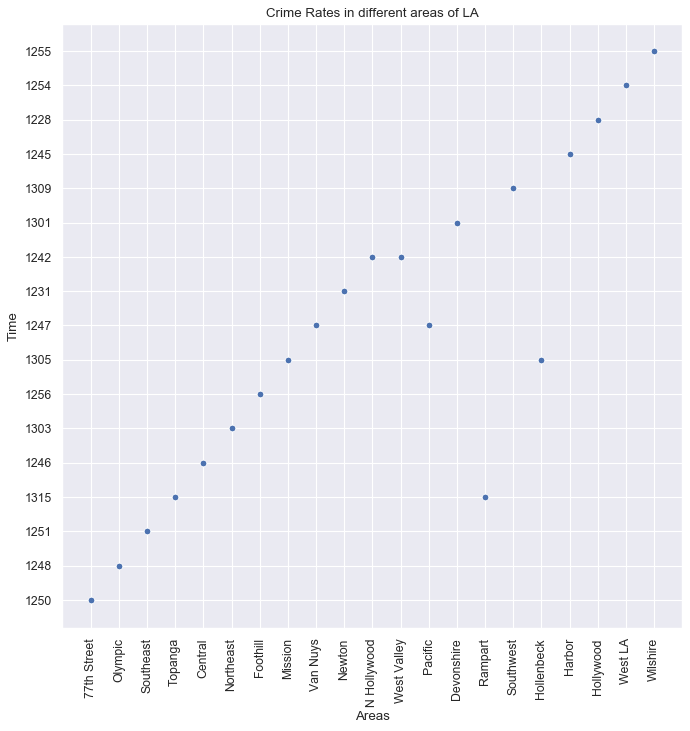

In [17]:
#graph shows the frequency of incidents

%matplotlib inline
fig = plt.figure(figsize = (10, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')
sns.scatterplot(x = "Areas", y = "Time", data = AreaTime_data)
plt.title("Crime Rates in different areas of LA")
plt.tick_params(axis ='x', rotation = 90)